In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/hp/Downloads/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# we do not have any null values in our dataset

In [5]:
df.duplicated().sum()

0

#As well as no duplicate values are there in our dataset

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
cat_cols = [i for i in df.columns if df[i].dtype == ' object']

In [8]:
cat_cols

[]

# As well as null values we do not have duplicate values too

# we have box plot for look whether the outlires are present or not

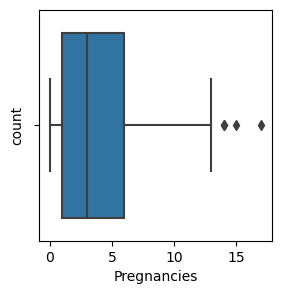

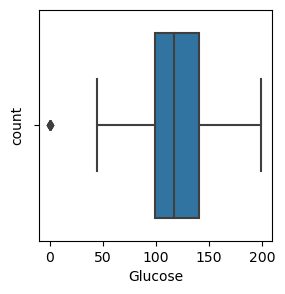

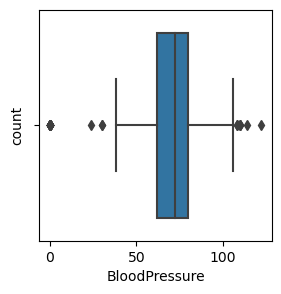

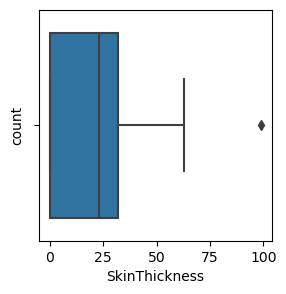

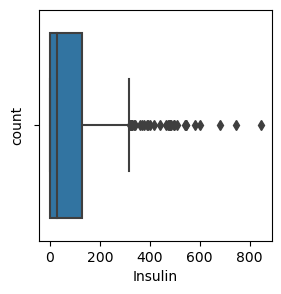

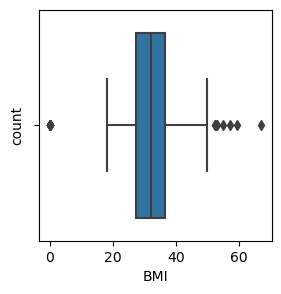

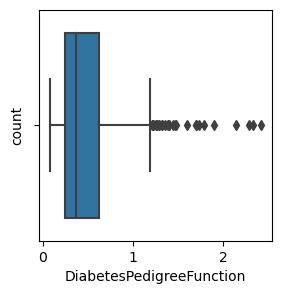

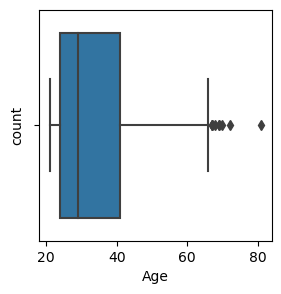

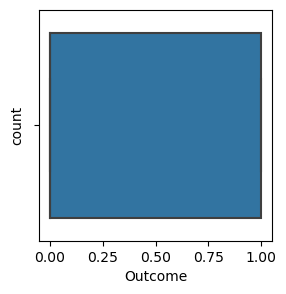

In [9]:
for col in df.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    

In [25]:
cols_outlier = ['Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [39]:
def remove_outliers(dataframe):
    for col in dataframe.columns:
        if (dataframe[col].dtype != 'object')&(col!='Outcome'):
            Q1 = dataframe[col].quantile(0.25)
            Q3 = dataframe[col].quantile(0.75)

            IQR = Q3 - Q1

            LB = Q1 - (1.5*IQR)
            UB = Q3 + (1.5*IQR)
            dataframe = dataframe[(dataframe[col]>=LB) & (dataframe[col]<=UB)]

    return dataframe

In [40]:
df = remove_outliers(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


# Now we have removed all the outliers present in our dataset

#check the histogram

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

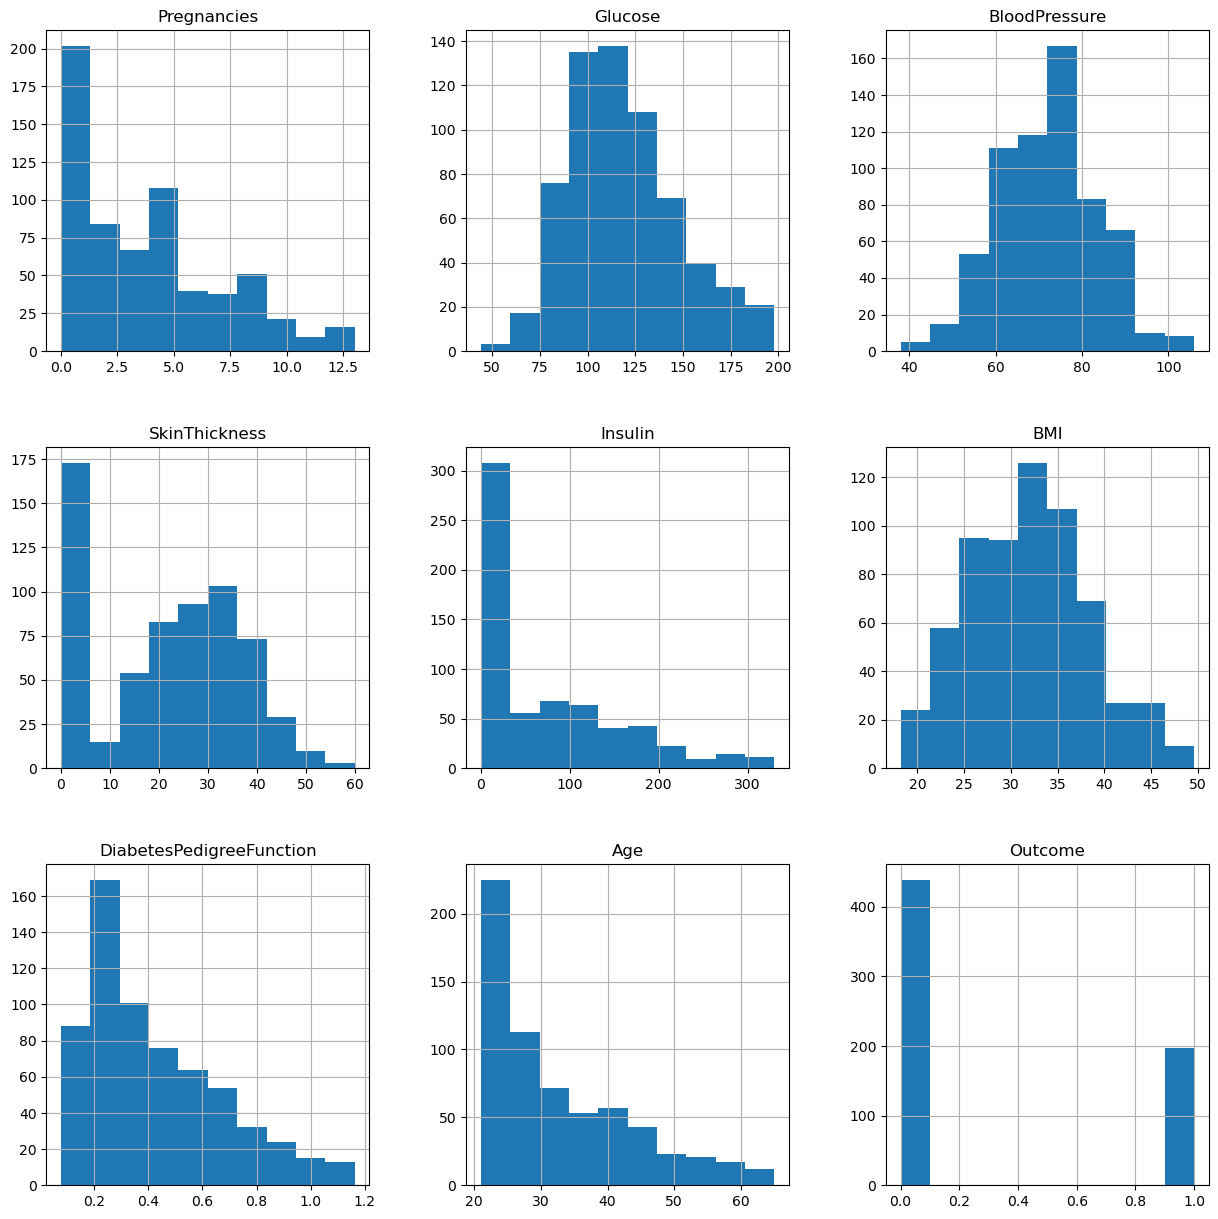

In [42]:
df.hist(figsize = (15,15),bins=10,)

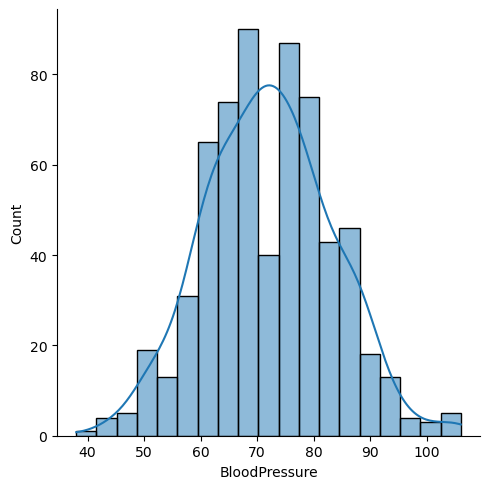

In [43]:
sns.displot(df.BloodPressure, kde=True)

# BloodPressure column is normaly distributed

#Hence the Imperical rule is applicable here which says that the whole data lies within the 3 standard deviation from the mean of BoodPressure column 

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

In [104]:
scaler = StandardScaler()
model = LogisticRegression()

In [105]:
X = df.drop('Outcome', axis = 1)

In [106]:
y = df['Outcome']

In [107]:
df['Outcome'].value_counts()

0    439
1    197
Name: Outcome, dtype: int64

Since we have imbalanced data that we are getting huge difference in output classes so our model could be over fit hence we are using SMOTE for oversampling

In [108]:
smote = SMOTE(random_state=23)

In [109]:
xtrain, xtest, ytrain , ytest = train_test_split(X, y, test_size=0.25, random_state=23)

In [110]:
x_train, y_train = smote.fit_resample(xtrain, ytrain)

In [111]:
y_train.value_counts()

0    328
1    328
Name: Outcome, dtype: int64

In [112]:
steps = [('Standard_scaler', scaler),
         ('Logistic_model', model)
        ]

In [113]:
pipe = Pipeline(steps)

In [114]:
pipe

Pipeline(steps=[('Standard_scaler', StandardScaler()),
                ('Logistic_model', LogisticRegression())])

In [115]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('Standard_scaler', StandardScaler()),
                ('Logistic_model', LogisticRegression())])

In [116]:
preds = pipe.predict(xtest)

In [117]:
preds

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1], dtype=int64)

In [119]:
accuracy_score(ytest, preds)

0.7421383647798742

In [120]:
xtest.iloc[14]

Pregnancies                   2.000
Glucose                     108.000
BloodPressure                62.000
SkinThickness                10.000
Insulin                     278.000
BMI                          25.300
DiabetesPedigreeFunction      0.881
Age                          22.000
Name: 279, dtype: float64

In [121]:
preds[14]

0

In [129]:
ytest.iloc[14]

0

In [124]:
input = []
for i in range(len(xtest.columns)):
    val = xtest.iloc[14][i]
    input.append(val)
    

In [125]:
pipe.predict([input])

array([0], dtype=int64)